<a href="https://colab.research.google.com/github/juasalazarmo/Signals_and_sistems/blob/main/DESARROLLO_PARCIAL_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Parcial II: Señales y Sistemas 2024-2**

**Profesor:**

Andrés Marino Álvarez Meza, Ph.D. Departamento de Ingeniería Eléctrica, Electrónica, y Computación

**Estudiantes:**

Diana Valverde De La Riviera

Juan Carlos Salazar Moreno

**Universidad Nacional de Colombia**

### **PUNTO 1**

Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t) = \left|A\cos\left(2\pi*Fo\right)\right|^2$, con $t\in [-1/2Fo, 1/2Fo]$. con A,Fo ∈ R+. Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud
 y fase como diagrama de Bode en decibelios), y presente el error relativo y la señal reconstruida para N = {1,2,...,50}.



## **Solución:**

Se tiene que:

$$\boxed{{\omega_0} = 2{\pi}F_0}$$

$$x(t)=\left|A\cos\left(2{\pi}F_0t\right)\right|^2 = A^2\cos^2\left(2{\pi}F_0t\right) =  A^2\cos^2\left({\omega_0}t\right)$$

.

recordando que:

$\cos^2(\theta) = \frac{1}{2}\left(1 + cos(2\theta)\right)$

entonces:

$$\boxed{x(t)= \left(\frac{A^2}{2}\right)\left(1 + \cos\left(2{\omega_0}t\right)\right)}$$

Ahora para la serie trigonométrica:

$$\boxed{x(t)= a_0 + \sum_{n=1}^{N=50}{a_n\cos(n\omega_0 t) + b_n\sin(n\omega_0 t)}},$$

donde:

$$\boxed{a_0 = c_0 = \frac{1}{t_f-t_i}\int_{t_i}^{t_f}x(t)dt}$$

$$\boxed{a_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\cos(n\omega_0 t)dt}$$

$$\boxed{b_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\sin(n\omega_0 t)dt}$$
.

$T = {t_f-t_i} = \frac{1}{2F_0} - (-\frac{1}{2F_0}) = \frac{2}{2F_0}  $

$$\boxed{T = \frac{1}{F_0}}$$


##Simulamos la señal de entrada con ${F_0} = 10 (Hz)$ ,   $ A = 5$

$$\boxed{x_0(t)= \left(\frac{5^2}{2}\right)\left(1 + \cos\left(2{\pi}(10)t\right)\right)}$$



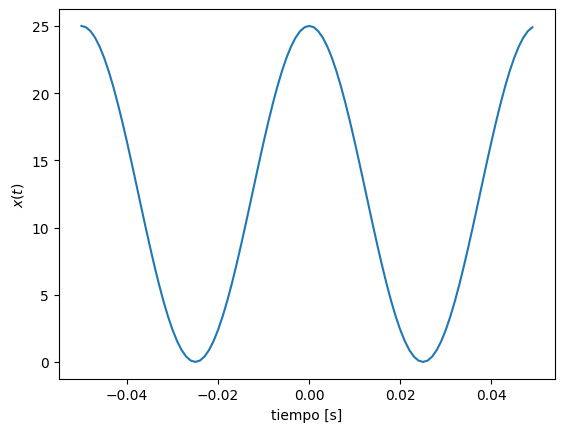

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = 5                                 #Amplitud = A**2
Fo = 10                               #Frecuencia fundamental (Hz)
ti = -1/(2*Fo)                        #Tiempo inicial
tf = 1/(2*Fo)                         #Tiempo final
T = tf-ti                             #Periodo
wo = 2*np.pi*Fo                       #Frecuencia angular
Fs = 100*Fo                      #Frecuencia muestreo estrictamente mayor a 2*Fo
tv = np.arange(ti,tf,1/Fs)            #Vector de tiempo
Nm = len(tv)                          #Muestras en el tiempo
xo = ((A**2)/2)*(1 + np.cos(2*wo*tv)) #señal de entrada
plt.plot(tv,xo)                       #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

##Dado que $x(t)$ presenta simetría par, $x(t)=x(-t)$:


 $$\boxed{b_n = 0 \quad \forall n \in \{1,\dots,50\}}$$

Así:

$$\boxed{x(t)= \left(\frac{A^2}{2} + \frac{A^2}{2}\cos\left(2{\omega_0}t\right)\right) =  a_0 + \sum_{n=1}^{N=50}{a_n\cos(n\omega_0 t)}}$$

.

##Calculamos $a_0$ que es quien condiciona el nivel DC de la señal.

$$a_0 = \frac{1}{\frac{1}{F_0}}\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}} \left(\frac{A^2}{2}\right)\left(1 + \cos\left(2{\omega_0}t\right)\right)dt$$

.

$$ a_0= \frac{A^2F_0}{2}\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}(1+cos(2{\omega_0}t))dt = \frac{A^2F_0}{2}\left(t\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}+\frac{sin(2{\omega_0}t)}{2{\omega_0}}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)$$

.

$$ a_0= \frac{A^2F_0}{2}\left(\frac{1}{2F_0}-\left(-\frac{1}{2F_0}\right)\right)+\frac{A^2F_0}{4{\omega_0}}\left(sin(2*2{\pi}F_0\left(\frac{1}{2F_0}\right))-sin(2*2{\pi}F_0\left(-\frac{1}{2F_0}\right))\right)$$

.

Simplificando la expresón, obtenemos:

$$a_0 =  \frac{A^2F_0}{2F_0} +  \frac{A^2F_0}{2}\left(2sin(2{\pi}\right)) $$

gracias a que la función seno es impar ($f(x)= -f(-x)$) obtuvimos $2sin(2{\pi})$, sin embargo, $sin(2{\pi}) = 0$, por lo tanto :

$$\boxed{a_0= \frac{A^2}{2}}$$

##por otra parte, está $a_n$ :

$$a_n = \frac{2}{\frac{1}{F_0}}\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}} \left(\frac{A^2}{2}\right)\left(1 + \cos\left(2{\omega_0}t\right)\right)(cos(n{\omega_0}t))dt$$

.

$$a_n = \frac{2}{\frac{1}{F_0}}\left(\frac{A^2}{2}\right)\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}cos(n{\omega_0}t)dt + \int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\left(\cos\left(2{\omega_0}t\right)\right)(cos(n{\omega_0}t))dt$$

recordando la identidad:

$cos(\alpha)*cos(\beta) = \frac{cos(\alpha+\beta)+cos(\alpha-\beta)}{2}$

.

$$a_n = \left(\frac{A^2F_0}{1}\right)\left(\left(\frac{sin(n2{\pi}F_0t)}{n2{\pi}F_0}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)+\left(\frac{sin(\left(n+2)(2{\pi}F_0t\right))}{2\left(n+2)(2{\pi}F_0\right)}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)+\left(\frac{sin(\left(n-2)(2{\pi}F_0t\right))}{2\left(n-2)(2{\pi}F_0\right)}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)\right)$$

.

después de evaluar y simplificar, obtenemos lo siguiente:

$$a_n = \left(\frac{A^2}{2{\pi}}\right)\left(\frac{2sin(n{\pi})}{n}+\frac{sin(\left(n+2){\pi}\right)}{(n+2)}+\frac{sin(\left(n-2){\pi}\right)}{(n-2)}\right)$$

.

Para $n\neq 0$ , $n\neq -2$y $n\neq 2$ , $a_n = 0.$ No obstante, para $n = 0$, $n = -2$ y $n = 2$ debemos calcular el límite y aproximar la indeterminación $\frac{0}{0}$:


$$a_0 = \frac{A^2}{2{\pi}}\lim_{n\to 0}\frac{\tfrac{d}{dn}\left[\sin(n\pi)\right]}{\tfrac{d}{dn}\left[n\right]} = \frac{A^2}{2{\pi}}\lim_{n\to 0}\frac{\cos(n\pi)(\pi)}{1}$$


$$\boxed{a_0= \frac{A^2}{2{\pi}}\left(\pi\right)= \frac{A^2}{2}}$$

.

$$a_2 = \frac{A^2}{2{\pi}}\lim_{n\to 2}\frac{\tfrac{d}{dn}\left[\sin((n-2)\pi)\right]}{\tfrac{d}{dn}\left[n-2\right]} = \frac{A^2}{2{\pi}}\lim_{n\to 2}\frac{\cos((n-2)\pi)(\pi)}{1} $$

$$a_2= \frac{A^2}{2{\pi}}(1)\left(\pi\right)= \frac{A^2}{2}$$

$$\boxed{a_2= \frac{A^2}{2}}$$

.

$$a_{-2} = \frac{A^2}{2{\pi}}\lim_{n\to -2}\frac{\tfrac{d}{dn}\left[\sin((n+2)\pi)\right]}{\tfrac{d}{dn}\left[n+2\right]} = \frac{A^2}{2{\pi}}\lim_{n\to- 2}\frac{\cos((n+2)\pi)(\pi)}{1} $$

$$a_2= \frac{A^2}{2{\pi}}(1)\left(\pi\right)= \frac{A^2}{2}$$

$$\boxed{a_{-2}= \frac{A^2}{2}}$$

por lo tanto:

$$\boxed{a_n = \left\{\begin{align} 0 & \quad \forall n \setminus \{-2,2\}\\
\frac{A^2}{2} & \quad n =  \{-2,2\}\\
\end{align}\right.}$$

$$\boxed{x(t) = a_0+\sum_{n=1}^{N}{a_n \sin(nt)} = a_0+b_2\cos(2{\omega_0t})=\frac{A^2}{2}+\frac{A^2}{2}\cos(2{\omega_0t})}$$

Para el caso de la serie exponencial compleja:

$$c_0 = a_0 = \frac{A^2}{2}$$

y

$$c_n = \frac{a_n - j b_n}{2}$$

Entonces:
$$\boxed{c_n = \left\{\begin{align}
\frac{A^2}{4} & \quad n = \{-2,2\}\\
\frac{A^2}{2} & \quad n = 0\\
0 & \quad \forall n \setminus \{-2,0,2\}
\end{align}\right.}$$

y

$$\boxed{x(t) = \sum_{n=-N}^{N}{c_n e^{j n t}}}$$


$$x(t) = c_{-2}e^{-j2t} + c_{0}e^{0} + c_{2}e^{j2t}$$

$$x(t)= \frac{A^2}{4}(\cos(2{\omega_0t})-j\sin(2{\omega_0t}))+\frac{A^2}{2}+\frac{A^2}{4}(\cos(2{\omega_0t})+j\sin(2{\omega_0t})) $$

Se cancela la función seno y nos queda:

$$\boxed{x(t) = \frac{2A^2}{4}\cos(2{\omega_0t})+\frac{A^2}{2}=\frac{A^2}{2}+\frac{A^2}{2}\cos(2{\omega_0t})}$$

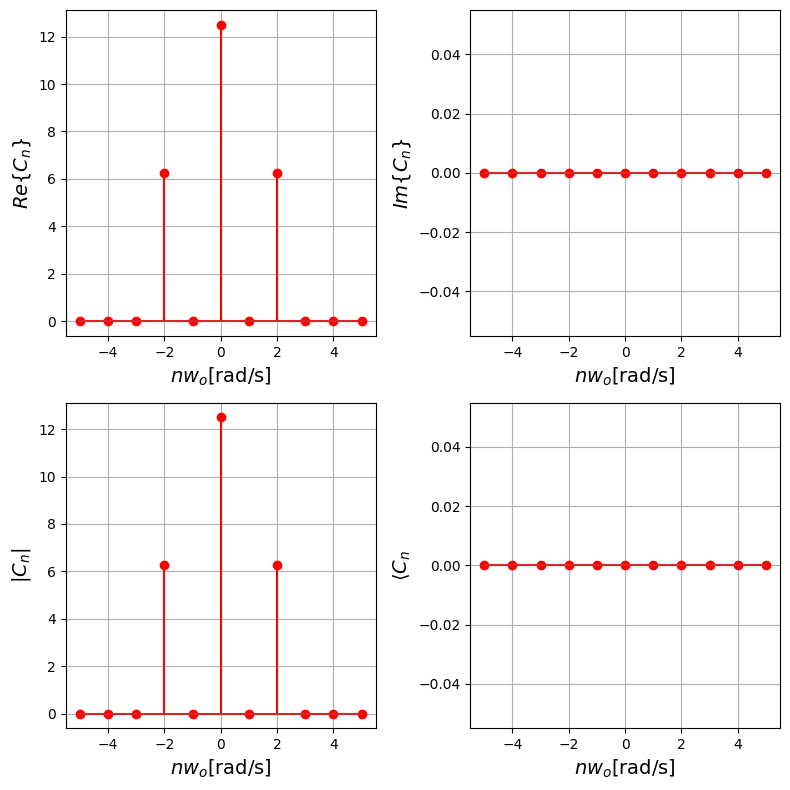

In [ ]:
#Se presenta la simulación del espectro y la reconstrucción

#Construir bases serie exponencial
N = 5 #Número de armónicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#espectro de la señal - serie exponencial
#calcular espectro -> cambiar según la señal estudiada
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn[N] = (A**2)/2 # nivel dc C_0
Cn[N-2] = (A**2)/4 # nivel armónico
Cn[N+2] = (A**2)/4

#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Para calcular el error relativo, necesitamos la potencia:


$$e_r[\%] = \frac{\bar{P}_e}{\bar{P_x}} *100[\%] = \left(1-\frac{\sum^N_{n=-N}|c_n|^2P_n}{\bar{P}_x}\right)*100[\%]$$

En este caso, la potencia de $x(t)$ se cálcula como:

\begin{equation}
P_x = \frac{1}{\frac{1}{F_0}}\int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}{|x(t)^2|dt} = \frac{1}{\frac{1}{F_0}}\int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}{|\frac{A^2}{2}+\frac{A^2}{2}j\cos(2{\omega_0t})|^2dt}= \frac{A^2F_0}{4}\left(\int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}dt + \int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}2*\cos(2{\omega_0t})dt + \int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}\cos^2(2{\omega_0t})dt\right)
\end{equation}

Resolviendo la ecuación:

$$\boxed{P_x= \frac{3A^4}{8}}$$

Para el caso de la serie exponencial de Fourier $P_n=1$, entonces:

\begin{equation}
E_r[\%] = 1 - \left(\frac{1}{P_x}\sum\limits_{n=-N}^N{|c_n|^2}\right)
\end{equation}

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


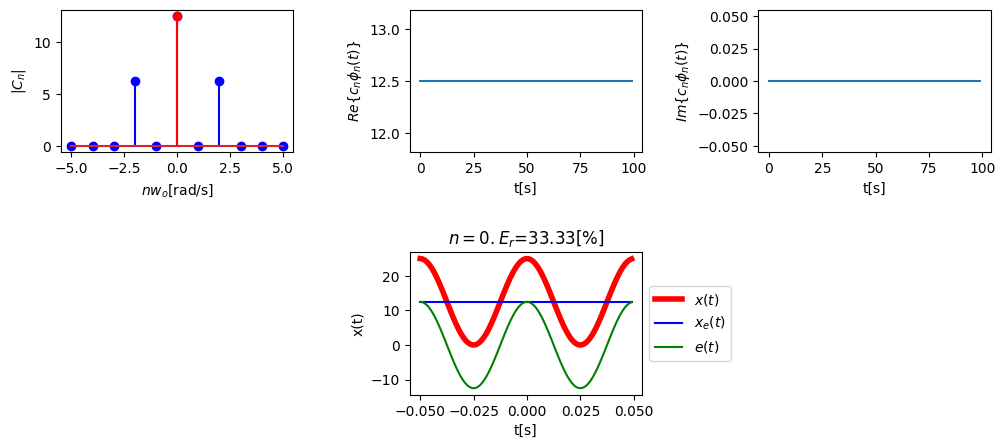

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

#reconstrucción
Px = (3*A**4)/(8)
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xo - xe

    ax[1,1].plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$n=%d. E_r$=%.2f[%%]' % (n,100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

    #desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

anim

# Punto 2

Sea la señal portadora $c(t) = A_c\sin(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$.  Luego, descargue desde youtube 5 segundos de su canción
 favorita (capturando del segundo 20 al 25). Presente una simulación de modulacoón por amplitud AM (tomando como mensaje el
 fragmento de la canción escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora
 y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de
 señal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el índice de modulación deseado.

 ## Solución:

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathscr{F}\{y(t)\} = \mathscr{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathscr{F}\{c(t)\}+\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\}$$

En este caso (utilizando tablas de Fourier), el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c)) + \frac{1}{j2}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$

     / 2.7 MB 11.3 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-stlsu078/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp
[youtube] Extracting URL: https://www.youtube.com/watch?v=hn3wJ1_1Zsg
[youtube] hn3wJ1_1Zsg: Downloading webpage
[youtube] hn3wJ1_1Zsg: Downloading tv client config
[youtube] hn3wJ1_1Zsg: Downloading player f3d47b5a
[youtube] hn3wJ1_1Zsg: Downloading tv player API JSON
[youtube] hn3wJ1_1Zsg: Downloading ios player API JSON
[youtube] hn3wJ1_1Zsg: Downloading m3u8 information
[info] hn3wJ1_1Zsg: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    4.41MiB in 00:00:00 at 6.76MiB/s
[ExtractAudio]

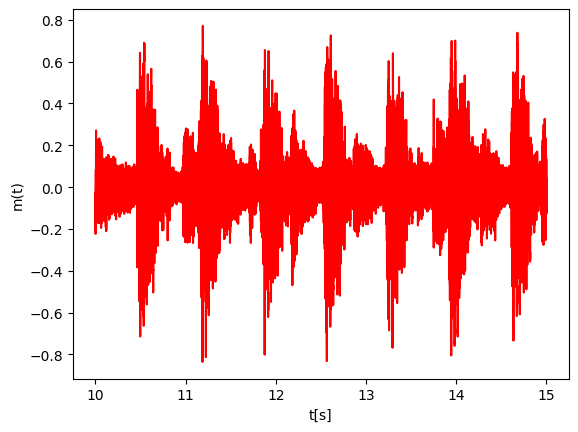

Amplitud de la portadora= 1.67120361328125
Señal portadora en el tiempo:


<ipython-input-2-323285e4038c>:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


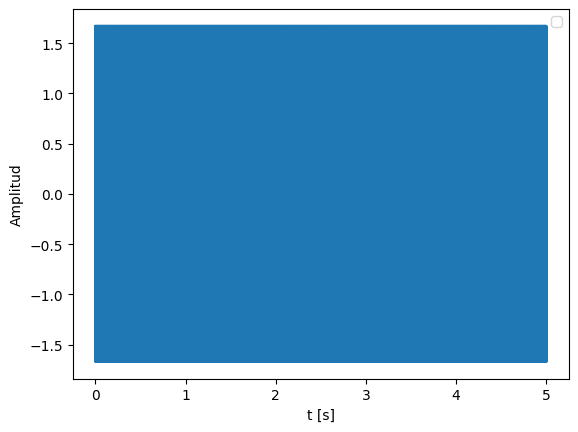

Señal portadora y señal mensaje:


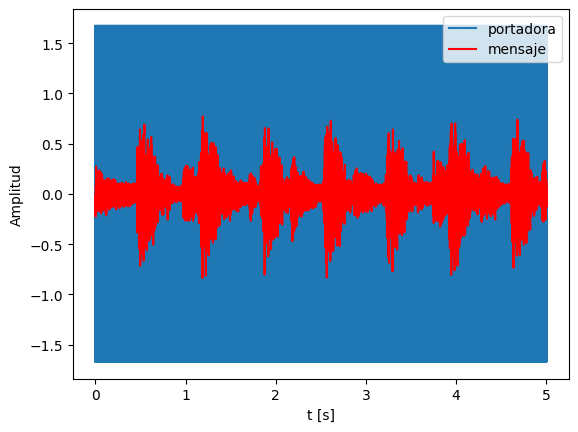

Señal modulada en AM:


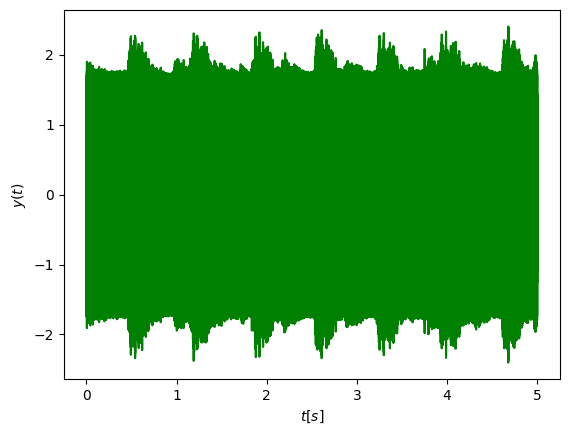

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz #se intala la librería que nos ayudará a realizar lo planteado.

link="https://www.youtube.com/watch?v=hn3wJ1_1Zsg"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

!ffmpeg -y -i audio.mp3 output.wav

!pip install soundfile

!apt-get update
!apt-get install ffmpeg -y
import os
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para leer el archivo wav
#lee archivos wav
nombre_out = "output.wav"

# Check if the file exists
if not os.path.exists(nombre_out):
    raise FileNotFoundError(f"File not found: {nombre_out}")

# Check if the file has read permissions
if not os.access(nombre_out, os.R_OK):
    raise PermissionError(f"Permission denied to read file: {nombre_out}")

x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

xpro= x.copy () #copiar archivos para procesar
ti=10 #tiempo inicial en el que tomaremos la medida
tf=15 #tiempo final de la medida
ts=tf-ti #segundos de la medida
m=xpro[int(ti*fs):int(tf*fs),0] #señal mensaje en el primer canal

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
tt= np.arange(ti,tf,1/fs) #vector de tiempo

#Graficamos la señal mensaje en el tiempo
print("Señal mensaje en el tiempo: ")
plt.plot(tt,m,"r")
plt.xlabel('t[s]')
plt.ylabel('m(t)')
plt.show()


Fc = 15000 #frecuencia de portadora
t = np.arange(0,ts,1/fs) #vector del tiempo
Im = float(input("Ingrese  el índice de modulación deseado;"))#0.5 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora
print(f"Amplitud de la portadora= {Ac}")

#Graficamos la señal portadora en el tiempo
print("Señal portadora en el tiempo:")
plt.plot(t,c)
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

#Graficamos las señales portadora y mensaje
print("Señal portadora y señal mensaje:")
plt.plot(t,c,label='portadora')
plt.plot(t,m,"r",label='mensaje')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


#señal modulada en AM
print("Señal modulada en AM:")
y = (1+m/Ac)*c
plt.plot(t,y,"g")
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

In [ ]:
print("Señal mensaje: ")
Audio(m,rate=fs)

Señal mensaje: 


In [ ]:
print("Señal portadora:")
Audio(c,rate=fs)

Señal portadora:


In [ ]:
print("Señal modulada en AM: ")
Audio(y,rate=fs)

Señal modulada en AM: 


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


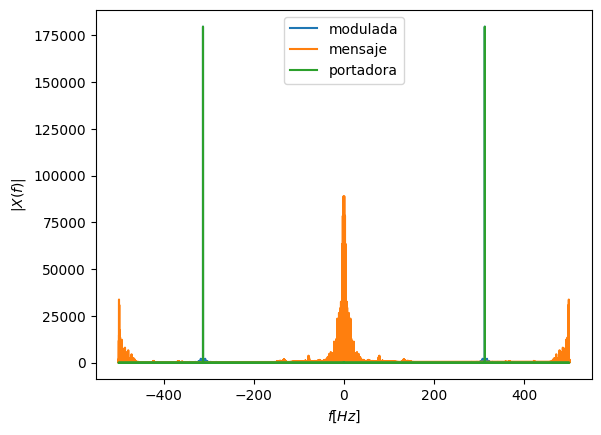

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir frecuencia de muestreo (fs)
fs = 10000  # Ajusta esto según tu caso

# Asegurar que los datos sean 1D
c = np.asarray(c).ravel()
x = np.asarray(x).ravel()
y = np.asarray(y).ravel()

# Cálculo de FFT
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(x)
Xfy = np.fft.fft(y)

# Frecuencia de muestreo
vfre_c = np.fft.fftfreq(len(c), 1/fs)
vfre_x = np.fft.fftfreq(len(x), 1/fs)  # Frecuencias para x
vfre_y = np.fft.fftfreq(len(y), 1/fs)  # Frecuencias para y


# Asegurar que las dimensiones coincidan
# The original code used 'vfre' which was not defined.
# Replacing it with 'vfre_y' as it is used for plotting Xfy
if len(vfre_y) != len(Xfy):
    vfre_y = vfre_y[:len(Xfy)]

# Graficar espectros
plt.plot(vfre_y, abs(Xfy), label='modulada')
plt.plot(vfre_x, abs(Xfm), label='mensaje')
plt.plot(vfre_c, abs(Xfc), label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.show()

#Punto 3
Consulte en qué consiste la distorsión total de armónicos (*Total Harmonic Distortion*-(THD) y el factor de potencia en un circuito eléctrico. Cómo puede calcularse el THD desde la FFt? Genere un ejemplo ilustrativo para el cálculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga: i)netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El usuario podrá escoger diferentes valores de R y C. Discuta los valores obtenidos.

#Solución:
La distorsión armónica total (THD) es una medida que cuantifica la distorsión en una forma de onda de voltaje o corriente alterna (CA) debido a la presencia de armónicos. Los armónicos son frecuencias que son múltiplos enteros de la frecuencia fundamental y pueden distorsionar la forma de onda original, creando picos y valles que no están presentes en una onda sinusoidal pura

El objetivo de realizar un ejemplo ilustrativo para el cálculo del **THD (Total Harmonic Distortion o Distorsión Armónica Total)** y la **distorsión del factor de potencia** para un rectificador de onda completa con carga es comprender cómo estas características afectan la calidad y eficiencia de los sistemas de conversión de energía. Esto es especialmente importante en aplicaciones de electrónica de potencia, donde los rectificadores son comúnmente utilizados para convertir corriente alterna (AC) en corriente continua (DC).

**Distorción armónica total (THD):**

El **THD** es una medida de la distorsión en una señal debido a la presencia de armónicos, los cuales son múltiplos de la frecuencia fundamental. Cuanto mayor sea el THD, más alejada está la señal de salida de una forma de onda ideal, lo que afecta el rendimiento de los equipos conectados.

En los sistemas de rectificación, la presencia de armónicos es común debido a la no linealidad del proceso de rectificación. Esta simulación permite al usuario ver cómo los diferentes valores de los componentes (resistencias y capacitancias) afectan el contenido armónico de la señal rectificada y, en consecuencia, el THD.
""")

**Distorción del factor de potencia (*DFP*):**

El **factor de potencia** mide cuán eficiente es el uso de la energía eléctrica en un sistema. Se calcula como la relación entre la potencia activa y la potencia aparente. La **distorsión del factor de potencia** indica cómo los armónicos impactan en la eficiencia de la transmisión de energía.

En cargas puramente resistivas, se espera que el factor de potencia esté más cerca de 1, lo que indica una conversión eficiente de la potencia. Sin embargo, en cargas inductivas o capacitivas, la distorsión del factor de potencia puede aumentar, lo que indica que hay más energía reactiva en el sistema que no contribuye a la potencia útil.

Se calcula mediante:

$\text{THD (\%)} = \frac{\sqrt{P_2 + P_3 + P_4 + \cdots}}{P_1} \times 100 = \frac{\sqrt{V_2^2 + V_3^2 + \dots + V_n^2}}{V_1} \times 100$

Donde $P_1$ es la potencia de la frecuencia fundamental, y $P_2,P_3,...,P_n$ es la potencia para el armónico $n$ de la fundamental, y cada $V_i$ corresponde a la amplitud respectiva del armónico.

X(s)/(C*R*s + 1)
seleccione (1) ó (2)
(1): Circuito RC serie
(2): Circuito R puro
Ingrese su opción: 1
Ingrese el valor de R (Ω): 1000
Ingrese el valor de C (F): 0.00001
La respuesta del circuito RC es: X(s)/(0.01*s + 1)
Ingrese la amplitud de la señal: 120
Ingrese la frecuencia de la señal de alimentación (Hz): 60
Señal de alimentación:


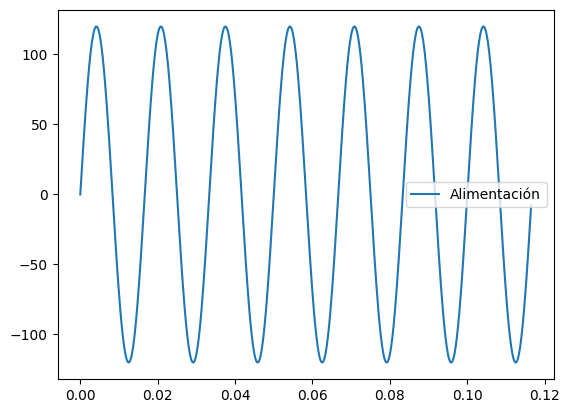

Tren de pulson:


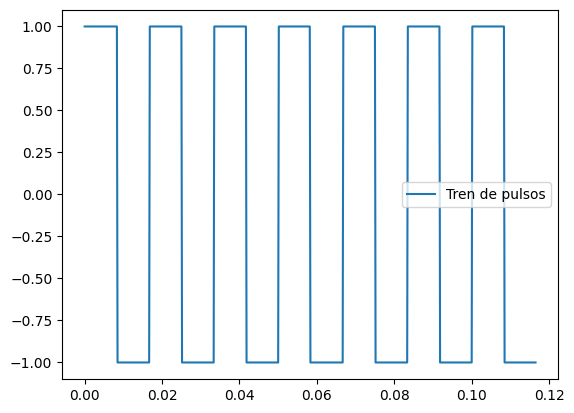

Entrada rectificada y salida del circuito:


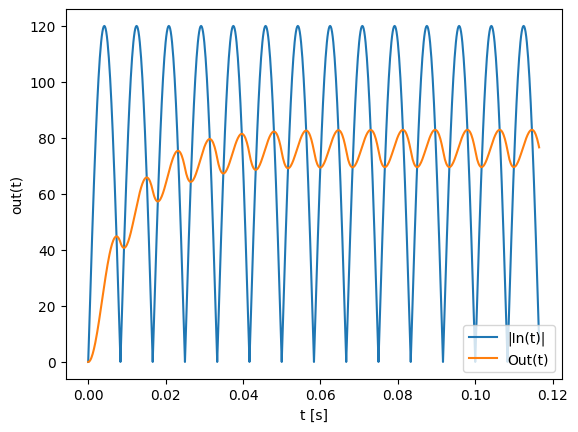

Espectro de la señal de salida:


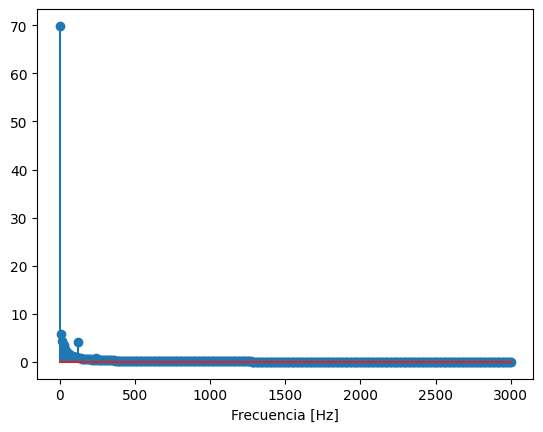

THD = 4228.028717009836 
PF_THD = 0.00023651683537691698


In [ ]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)
Y = 1/(R*C*s + 1) * X
print(Y)


while True:
  print("seleccione (1) ó (2)")
  print("(1): Circuito RC serie")
  print("(2): Circuito R puro")
  circuito = int(input("Ingrese su opción: "))
  if circuito == 1:
    R_v = float(input("Ingrese el valor de R (Ω): "))
    C_v = float(input("Ingrese el valor de C (F): "))
    Y_RC = Y.subs(R, R_v).subs(C, C_v)
    print(f"La respuesta del circuito RC es: {Y_RC}")
    break
  elif circuito == 2:
    R_v = float(input("Ingrese el valor de R: "))
    C_v = 0
    Y_R = Y.subs(R, R_v).subs(C,C_v)
    print(f"La respuesta del circuito R puro es: {Y_R}")
    break
  else:
    print("Opción no válida. Intente nuevamente.")


#Función de transferencia en scipy

num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia



A = float(input("Ingrese la amplitud de la señal: "))
Fo = float(input("Ingrese la frecuencia de la señal de alimentación (Hz): "))
Fs = 100*Fo #frecuencia de muestreo (Hz)
To = 1/Fo #periodo fundamental (s)
Ts = 1/Fs #periodo muestreo (s)
t = np.arange(0, 7*To,Ts) # se simulan 7 peridos de alimentación con un muestreo segun Ts

#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))

#Función tren de pulsos para simular señal rectificada
rec_c = sig.square(2*np.pi*Fo*t)

in_=in_o*rec_c
#Evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy
out = G_n.output(in_, T=t)[1]


print("Señal de alimentación:")
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

print("Tren de pulson:")
plt.plot(t,rec_c, label="Tren de pulsos")
plt.legend()
plt.show()

print("Entrada rectificada y salida del circuito:")
plt.plot(t, in_,label='|In(t)|')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.legend()
plt.show()


#Cálculo del espectro con fft
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out) # Espectro de la señal de salida

magXf = np.abs(Xf) # Magnitud de los armónicos
longitud_señal= len(out)
magnitudes_tensiones= magXf* 2/longitud_señal # Armónicos en terminos de tensión, incluyendo V1
indice_fundamental = np.argmin(np.abs(vfre- Fo))
V1 = magnitudes_tensiones[indice_fundamental]

#Cálculo de la distorsión total de armónicos - THD
THD = (np.sqrt(magnitudes_tensiones-V1))/V1
#Distorsión del factor de potencia
PF_thd= np.sqrt(1/(1+THD**2))



print("Espectro de la señal de salida:")
plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('')
plt.show()




print(f"THD = {THD} ")
print(f"PF_THD = {PF_thd_}")

In [ ]:
magXf = np.abs(Xf) # Magnitud de los armónicos
longitud_señal= len(out)
magnitudes_tensiones= magXf* 2/longitud_señal # Armónicos en terminos de tensión, incluyendo V1
indice_fundamental = np.argmin(np.abs(vfre- Fo))
V1 = magnitudes_tensiones[indice_fundamental]

#Cálculo de la distorsión total de armónicos - THD
THD = (np.sqrt(magnitudes_tensiones-V1))/V1
#Distorsión del factor de potencia
PF_thd= np.sqrt(1/(1+THD**2))

139.69950796031148

In [ ]:
def calcular_thd(frecuencias, espectro, frecuencia_fundamental):

  # Encontrar el índice de la frecuencia fundamental
  indice_fundamental = np.argmin(np.abs(frecuencias - frecuencia_fundamental))
  # Calcular la potencia de la frecuencia fundamental
  potencia_fundamental = np.abs(espectro[indice_fundamental])**2
  # Calcular la potencia de los armónicos
  potencia_armonicos = np.sum(np.abs(espectro)**2) - potencia_fundamental

  # Calcular el THD
  thd = 100 * np.sqrt(potencia_armonicos / potencia_fundamental)

  return thd

#Las frecuencias (vfre) se calcularon utilizando np.fft.rfftfreq.
#El espectro (Xf) también se calculó usando np.fft.rfft.
#En este caso, la frecuencia fundamental es la frecuencia de la señal de alimentación (Fo)
THD = calcular_thd(vfre,Xf,Fo)
print(f"THD = {THD} ")

#La medida de distorsión del factor de potencia se puede calcular desde el THD, como:
PF_thd_= np.sqrt(1/(1+(THD**2)))
print(f"PF_THD = {PF_thd_}")

NameError: name 'vfre' is not defined

#Discusión o conclusiones:


*   Se observa como a medida que variamos los valores de R y C el THD no variará. Una resistencia alta o una capacitancia baja tienden a aumentar la distorción armónica.
*   Un THD alto lleva a un factor de potencia mas bajo indicando una menor eficiencia. En conclusión ajustar los valores de R y C nos permiten mejorar la eficiencia minimizando distorciones.

#Punto 4

Desarrolle un sistema para identificar una palabra clave y autenticar al hablante utilizando herramientas basadas en la Transformada de Fourier. El sistema debe presentarse como un Dashboard en Streamlit y cumplir con las siguientes condiciones: i) Permitir el acceso únicamente si un miembro del grupo pronuncia la palabra clave. ii) Denegar el acceso en cualquier otro caso.
Además, se debe presentar y describir el esquema de solución que incluya: i) Diseño del sistema de detección. ii) La base de datos creada para almacenar los patrones de voz y palabras clave. iii) Las consideraciones técnicas para implementar la solución, incluyendo el uso de la Transformada de Fourier para procesar las señales de voz.

In [ ]:

import gdown

# ID del archivo en Google Drive
file_id = "1Pe3NYKymDlFqSPw21kbkx68ryo5OqTSe"
output = "audio.wav"

# Descargar el archivo
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", output, quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1Pe3NYKymDlFqSPw21kbkx68ryo5OqTSe
To: /content/audio.wav
100%|██████████| 5.85M/5.85M [00:00<00:00, 44.6MB/s]


'audio.wav'

In [ ]:
#Necesitamos detecatr en que momentos nos demoramos menos pronunciando la palabra "señal"
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Cargar el audio
audio_path = "audio.wav"
y, sr = librosa.load(audio_path, sr=None)

# Detectar regiones de energía alta (posibles palabras clave)
energy = librosa.feature.rms(y=y)[0]  # Calcula la energía
frames = np.nonzero(energy > np.percentile(energy, 75))  # Encuentra partes con más energía
times = librosa.frames_to_time(frames, sr=sr)  # Convierte a tiempo

# Encuentra segmentos donde la palabra se repite (basado en pausas entre palabras)
segments = []
start = None

for t in times[0]:
    if start is None:
        start = t
    elif t - start > 0.5:  # Si hay una pausa mayor a 0.5 seg, guarda el segmento
        segments.append((start, t))
        start = None

# Encuentra el segmento más corto
min_segment = min(segments, key=lambda s: s[1] - s[0])
start_time, end_time = min_segment

# Extraer y guardar el audio recortado
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
recorte = y[start_sample:end_sample]

wavfile.write("palabra_mas_corta.wav", sr, (recorte * 32767).astype(np.int16))

print(f"Fragmento guardado: {start_time:.2f}s - {end_time:.2f}s")


Fragmento guardado: 20.92s - 21.82s


Tamaño del segmento de audio: 39424
Valores del segmento: [0.32418823 0.3223877  0.3156891  0.30270386 0.28886414 0.27796936
 0.26860046 0.25820923 0.24662781 0.2361145 ]
Frecuencias positivas: [ 0.          1.11860795  2.23721591  3.35582386  4.47443182  5.59303977
  6.71164773  7.83025568  8.94886364 10.06747159]
Magnitudes positivas: [14.504272 11.81031  13.458217 13.510237 12.87908  14.176298 13.964858
 13.597759 13.170277 12.015657]


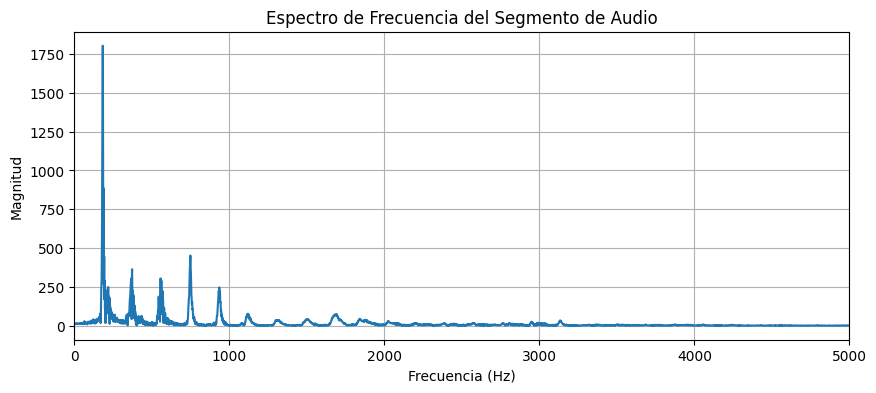

In [ ]:
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

# Verifica el segmento de audio
print("Tamaño del segmento de audio:", len(recorte))
print("Valores del segmento:", recorte[:10])  # Muestra los primeros 10 valores

# Calcular la Transformada de Fourier
n = len(recorte)
if n == 0:
    print("El segmento de audio está vacío. Revisa la extracción del segmento.")
else:
    frecuencias = fft(recorte)
    magnitudes = np.abs(frecuencias)

    # Frecuencias correspondientes
    freqs = np.fft.fftfreq(n, d=1/sr)

    # Solo nos interesan las frecuencias positivas
    positive_freqs = freqs[:n//2]
    positive_magnitudes = magnitudes[:n//2]

    # Verifica los datos de la Transformada de Fourier
    print("Frecuencias positivas:", positive_freqs[:10])  # Primeras 10 frecuencias
    print("Magnitudes positivas:", positive_magnitudes[:10])  # Primeras 10 magnitudes

    # Grafica el espectro de frecuencia
    plt.figure(figsize=(10, 4))
    plt.plot(positive_freqs, positive_magnitudes)
    plt.title('Espectro de Frecuencia del Segmento de Audio')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.grid()
    plt.xlim(0, 5000)  # Limita el rango de frecuencias
    plt.show()


In [ ]:
#Cargamos un audio en el que se dicen palabras incorrectas
import gdown

# ID del archivo en Google Drive
file_id = "1ME13tPBE3WBNLHfhYpAPtrVKCd9i0YeT"
output = "audio.wav2"

# Descargar el archivo
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1ME13tPBE3WBNLHfhYpAPtrVKCd9i0YeT
To: /content/audio.wav2
100%|██████████| 6.71M/6.71M [00:00<00:00, 47.0MB/s]


'audio.wav2'

In [ ]:
!pip install pydub
from pydub import AudioSegment, silence

# Cargar el audio
audio = AudioSegment.from_wav("audio.wav2")

# Detectar los silencios en el audio
# Aquí usamos un umbral de -40 dB y una duración mínima de silencio de 300 ms
# Ajusta estos parámetros según el audio que tienes para obtener mejores resultados
silences = silence.split_on_silence(audio, min_silence_len=300, silence_thresh=-40)

# Recortar y guardar cada palabra detectada
for i, segment in enumerate(silences):
    # Guardar cada palabra como un archivo separado
    segment.export(f"palabra_{i+1}.wav", format="wav")
    print(f"Palabra {i+1} guardada")

print(f"Se han guardado {len(silences)} palabras.")


Palabra 1 guardada
Palabra 2 guardada
Palabra 3 guardada
Palabra 4 guardada
Palabra 5 guardada
Palabra 6 guardada
Palabra 7 guardada
Palabra 8 guardada
Palabra 9 guardada
Palabra 10 guardada
Palabra 11 guardada
Palabra 12 guardada
Palabra 13 guardada
Palabra 14 guardada
Palabra 15 guardada
Palabra 16 guardada
Palabra 17 guardada
Palabra 18 guardada
Palabra 19 guardada
Palabra 20 guardada
Palabra 21 guardada
Palabra 22 guardada
Palabra 23 guardada
Palabra 24 guardada
Palabra 25 guardada
Palabra 26 guardada
Palabra 27 guardada
Palabra 28 guardada
Palabra 29 guardada
Palabra 30 guardada
Se han guardado 30 palabras.


Palabra 1 almacenada en la lista.
Palabra 2 almacenada en la lista.
Palabra 3 almacenada en la lista.
Palabra 4 almacenada en la lista.
Palabra 5 almacenada en la lista.
Palabra 6 almacenada en la lista.
Palabra 7 almacenada en la lista.
Palabra 8 almacenada en la lista.
Palabra 9 almacenada en la lista.
Palabra 10 almacenada en la lista.
Palabra 11 almacenada en la lista.
Palabra 12 almacenada en la lista.
Palabra 13 almacenada en la lista.
Palabra 14 almacenada en la lista.
Palabra 15 almacenada en la lista.
Palabra 16 almacenada en la lista.
Palabra 17 almacenada en la lista.
Palabra 18 almacenada en la lista.
Palabra 19 almacenada en la lista.
Palabra 20 almacenada en la lista.
Palabra 21 almacenada en la lista.
Palabra 22 almacenada en la lista.
Palabra 23 almacenada en la lista.
Palabra 24 almacenada en la lista.
Palabra 25 almacenada en la lista.
Palabra 26 almacenada en la lista.
Palabra 27 almacenada en la lista.
Palabra 28 almacenada en la lista.
Palabra 29 almacenada en la l

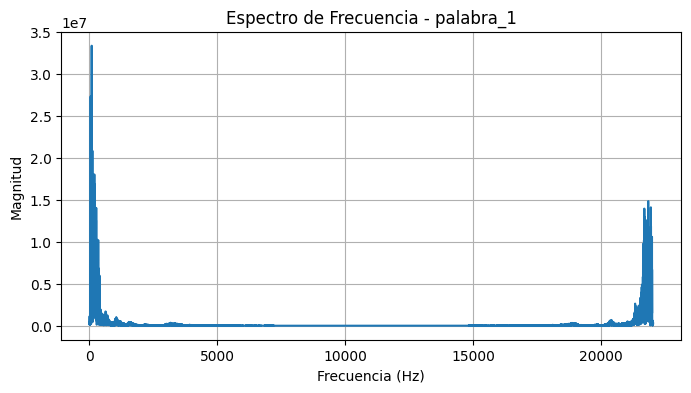

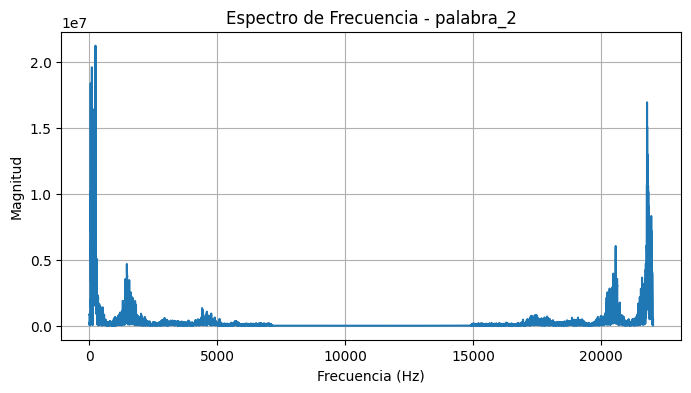

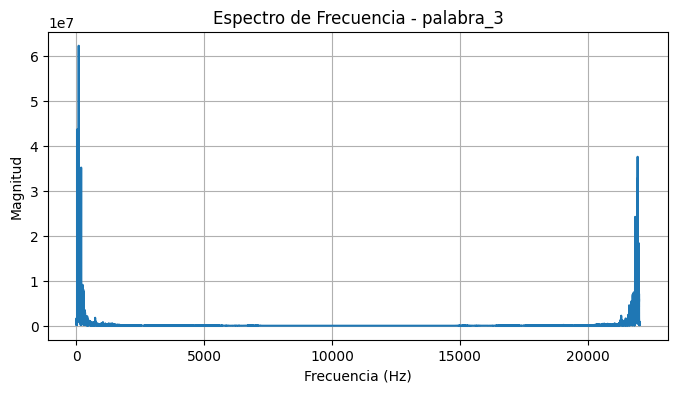

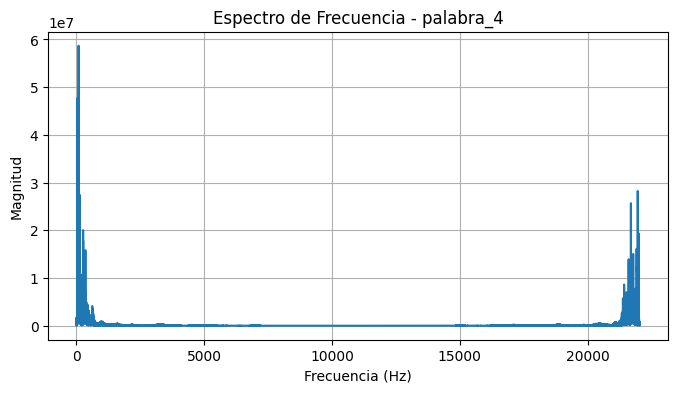

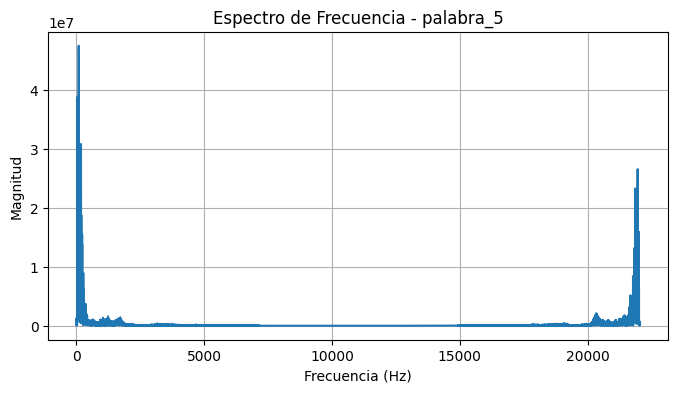

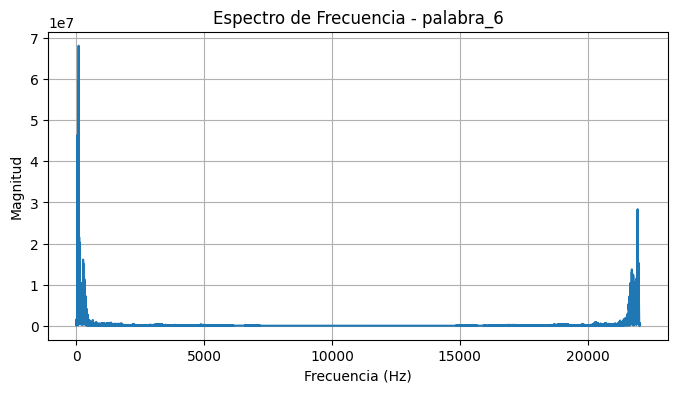

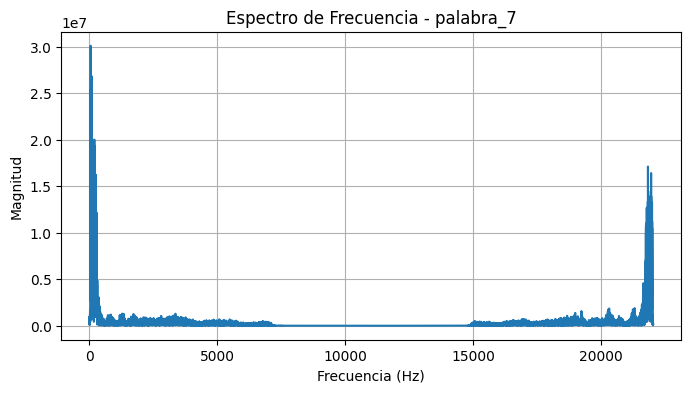

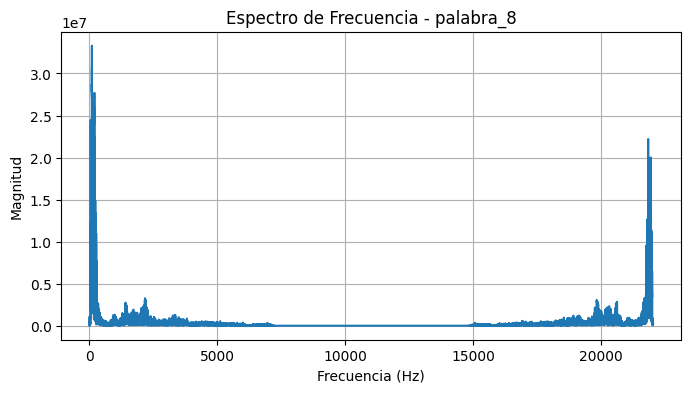

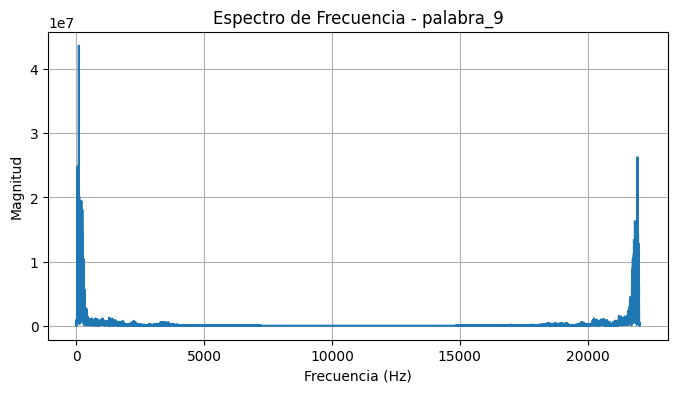

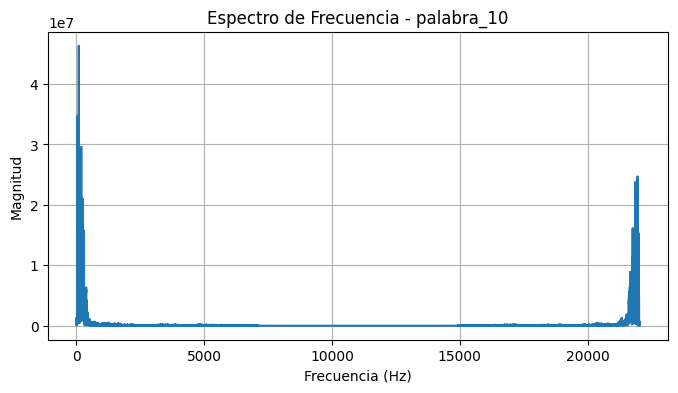

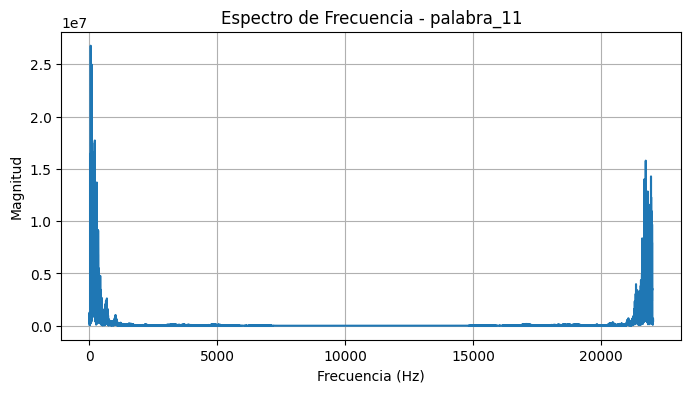

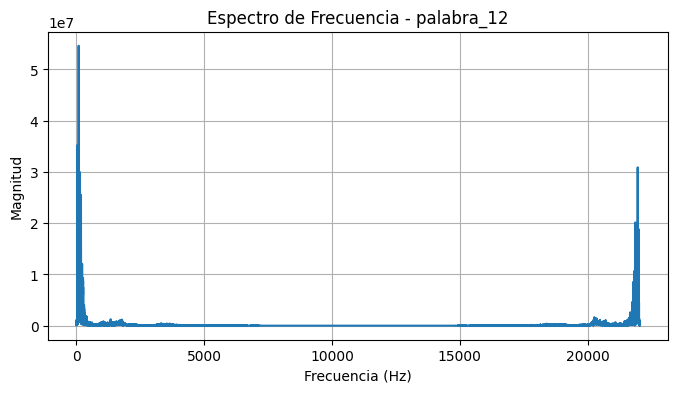

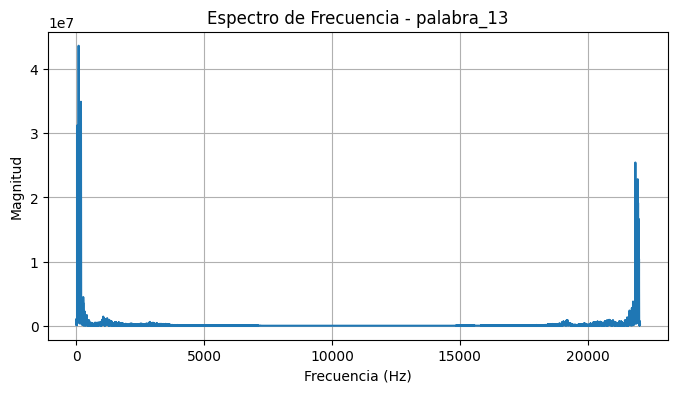

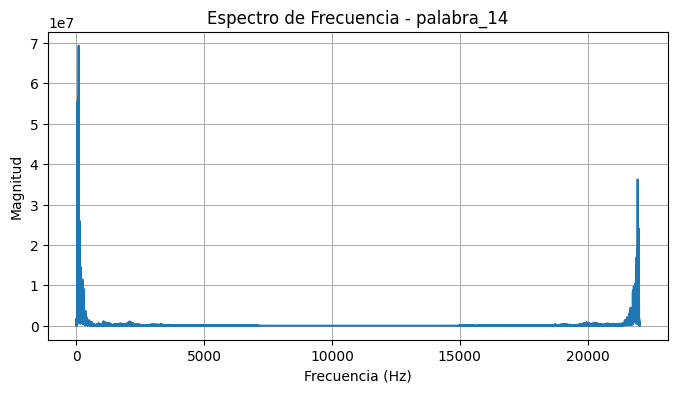

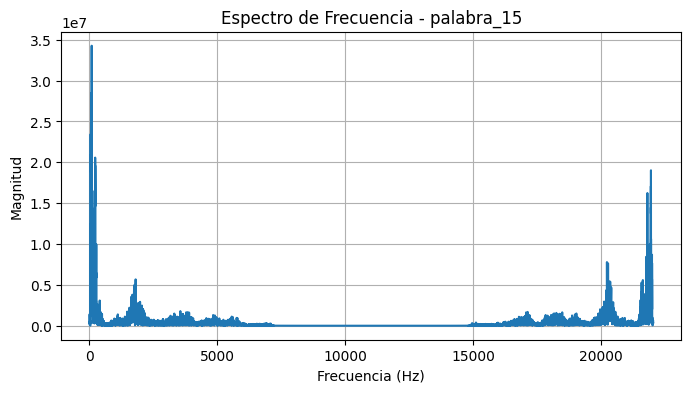

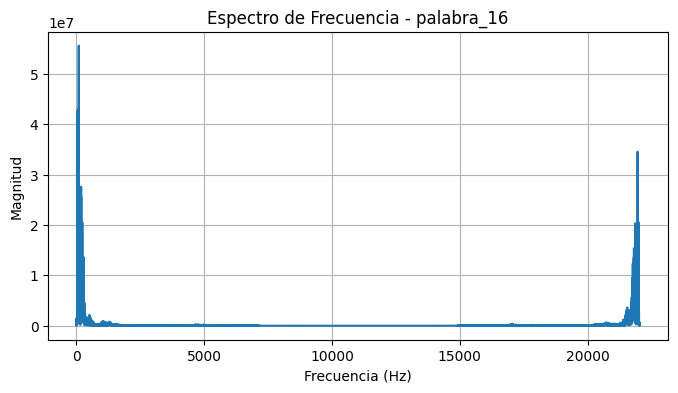

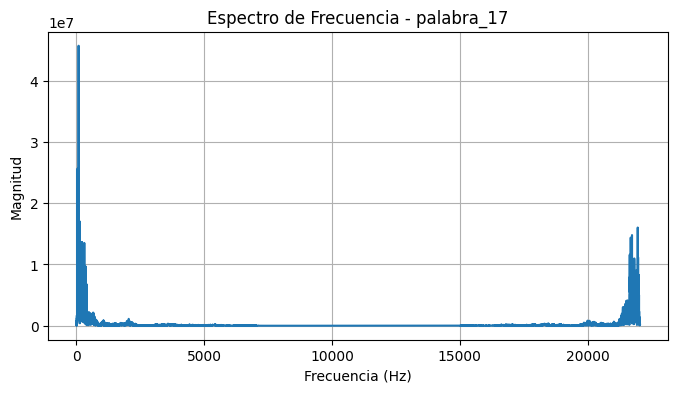

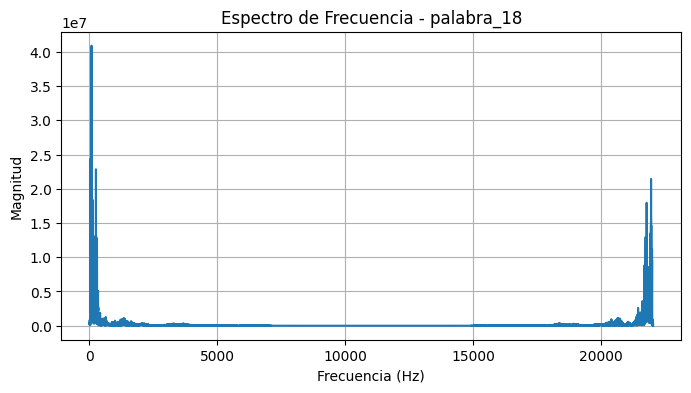

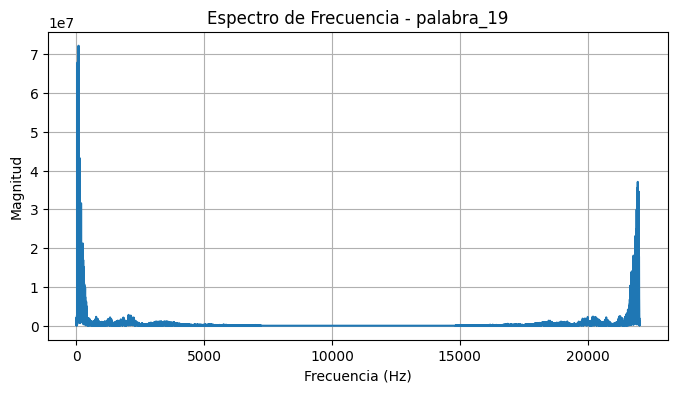

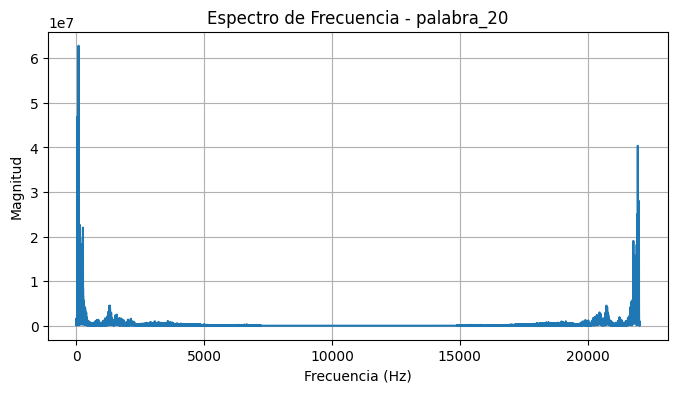

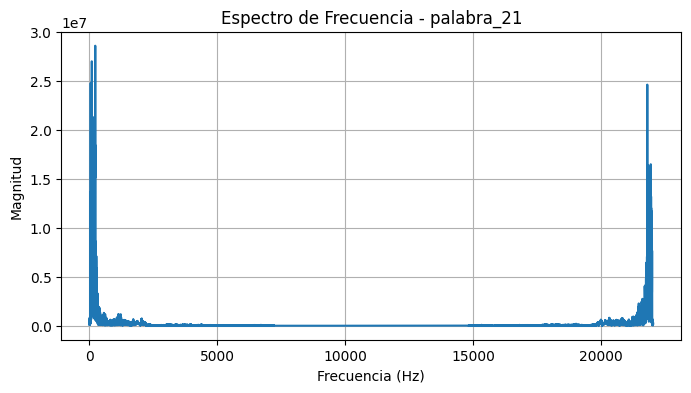

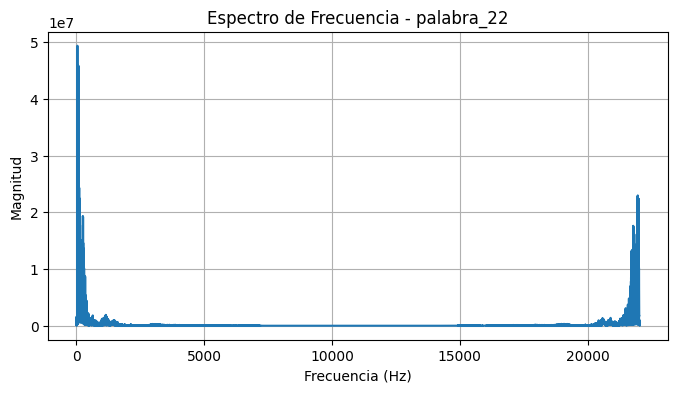

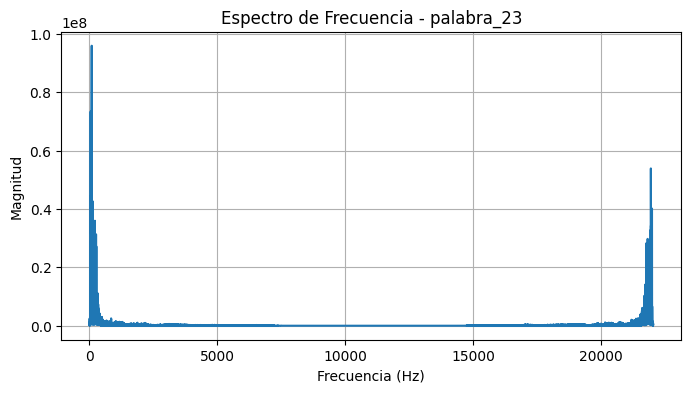

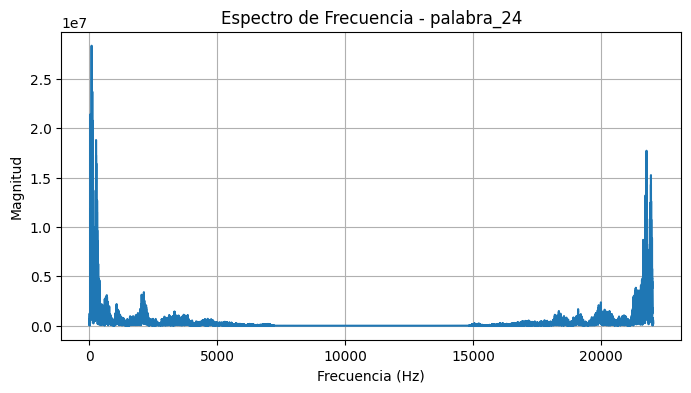

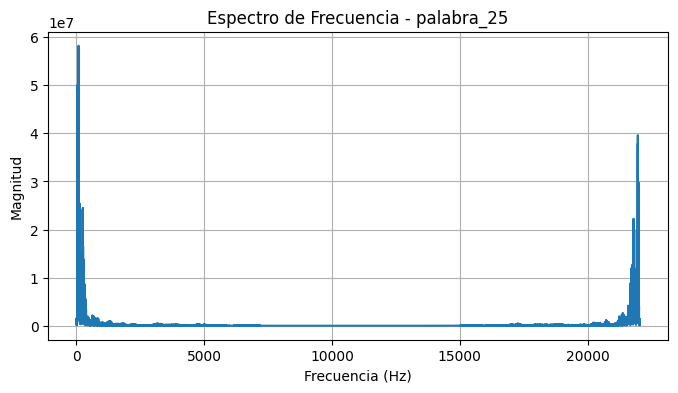

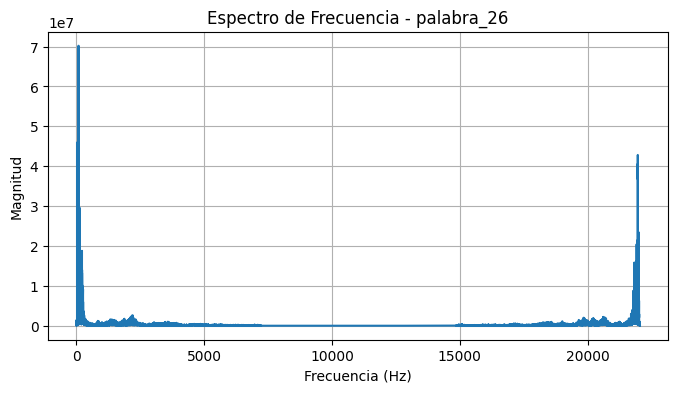

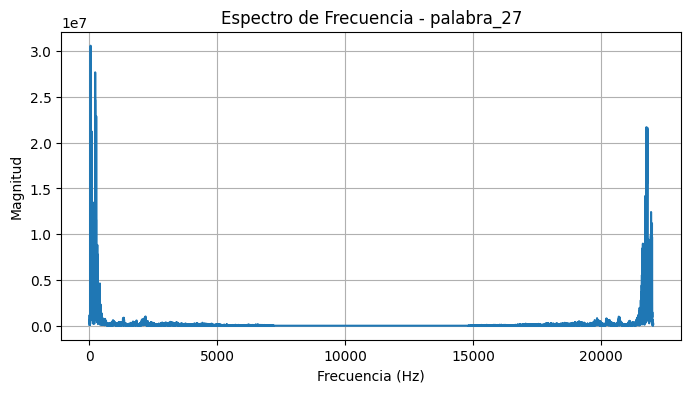

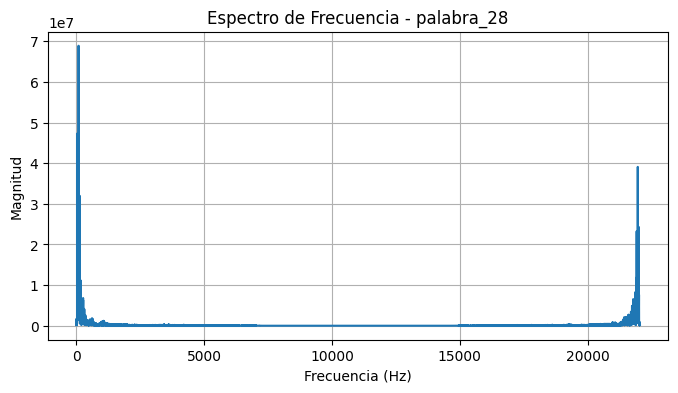

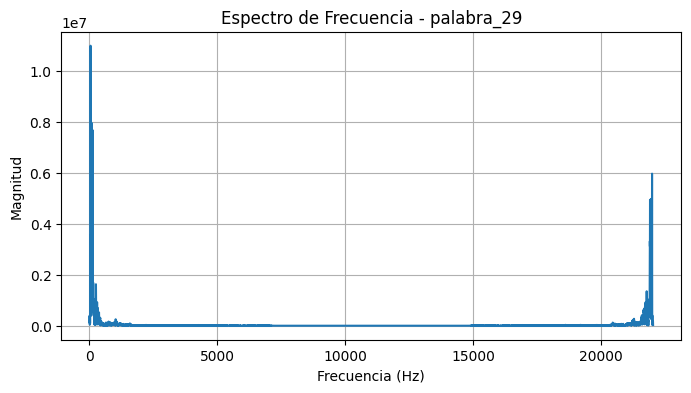

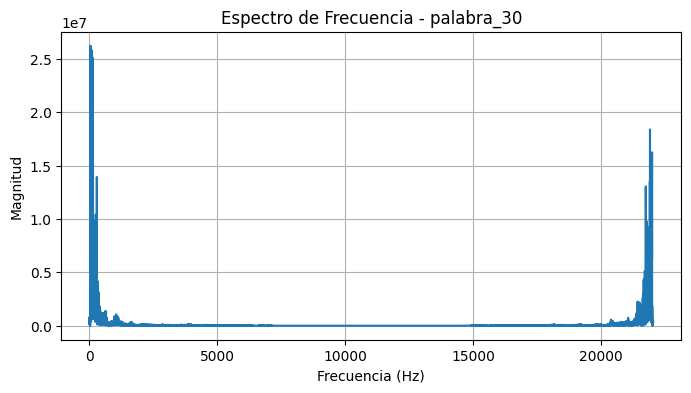

In [ ]:
!pip install pydub
from pydub import AudioSegment, silence
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Cargar el audio
audio = AudioSegment.from_wav("audio.wav2")

# Detectar los silencios en el audio
# Aquí usamos un umbral de -40 dB y una duración mínima de silencio de 300 ms
# Ajusta estos parámetros según el audio que tienes para obtener mejores resultados
silences = silence.split_on_silence(audio, min_silence_len=300, silence_thresh=-40)

# Lista para almacenar los segmentos de audio
segmentos_audio = []

# Recortar y almacenar cada palabra detectada
for i, segment in enumerate(silences):
    # Convertir el segmento a un array de numpy
    samples = np.array(segment.get_array_of_samples())
    sr = segment.frame_rate  # Tasa de muestreo
    segmentos_audio.append({
        "muestras": samples,
        "sr": sr,
        "nombre": f"palabra_{i+1}"
    })
    print(f"Palabra {i+1} almacenada en la lista.")

print(f"Se han almacenado {len(segmentos_audio)} palabras.")

# Función para calcular la FFT de un segmento de audio
def calcular_fft(muestras, sr):
    """
    Calcula la FFT de un segmento de audio y devuelve las frecuencias y magnitudes.
    """
    n = len(muestras)
    frecuencias = fft(muestras)
    magnitudes = np.abs(frecuencias)
    positive_freqs = np.fft.fftfreq(n, d=1/sr)[:n//2]
    positive_magnitudes = magnitudes[:n//2]
    return positive_freqs, positive_magnitudes

# Procesar cada segmento de audio con la FFT
for segmento in segmentos_audio:
    muestras = segmento["muestras"]
    sr = segmento["sr"]
    nombre = segmento["nombre"]

    # Calcular la FFT
    frecuencias, magnitudes = calcular_fft(muestras, sr)

    # Graficar el espectro de frecuencia
    plt.figure(figsize=(8, 4))
    plt.plot(frecuencias, magnitudes)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.title(f'Espectro de Frecuencia - {nombre}')
    plt.grid()
    plt.show()